<h1>Setup</h1>

In [3]:
import tensorflow as tf 
import os

In [4]:
# OPTIONAL: Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

<h1>Load Data</h1>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
# Get all of the images from the 3 files
data = tf.keras.utils.image_dataset_from_directory('data')

Found 6167 files belonging to 2 classes.


In [7]:
# Access the class names
class_names = data.class_names
print(class_names)

['Dementia', 'NonDementia']


In [8]:
# Turn the files into numpy iterators for their batches (loop through baches now)
# Shuffles them as well
data_iterator = data.as_numpy_iterator()

In [9]:
# Get next batch of image
# Batch is a tuple of (image (32, height, width, channel), label)
batch = data_iterator.next()

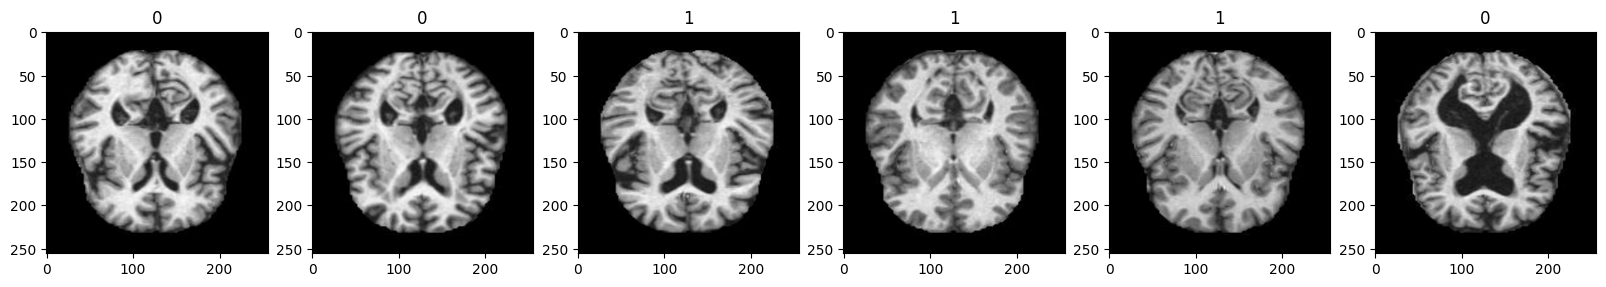

In [10]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

<h1>Scaling</h1>

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

<h1>Split Data and Train</h1>

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
train_size

135

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# from sklearn.utils.class_weight import compute_class_weight

In [67]:
# class_counts = [896, 64, 3200, 2240]
# class_weights = compute_class_weight(
#     class_weight='balanced',
#     classes=np.arange(len(class_counts)),
#     y=np.concatenate([np.full(count, i) for i, count in enumerate(class_counts)])
# )
# class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
# print("Class Weights:", class_weight_dict)

Class Weights: {0: 1.7857142857142858, 1: 25.0, 2: 0.5, 3: 0.7142857142857143}


In [80]:
# data_augmentation = Sequential([
#     tf.keras.layers.RandomFlip('horizontal'),
#     tf.keras.layers.RandomRotation(0.2),
#     tf.keras.layers.RandomZoom(0.2)
# ])

In [17]:
model = Sequential()

In [18]:
# CNN with ReLU activations (256,256,3 input shape for the start (what each image is))
model.add(Conv2D(32, (3,3), strides=1, activation='relu', input_shape=(256,256,3)))
# Max pooling cuts the output size in half
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
# Dense layer to yield 256 Neurons
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Dalton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,233,985 (50.48 MB)

 Trainable params: 13,233,985 (50.48 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
logdir='logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [77]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [23]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 73s 529ms/step - accuracy: 0.5271 - loss: 0.7270 - val_accuracy: 0.6924 - val_loss: 0.5927
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 72s 531ms/step - accuracy: 0.7124 - loss: 0.5659 - val_accuracy: 0.7303 - val_loss: 0.5207
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 72s 531ms/step - accuracy: 0.7565 - loss: 0.4937 - val_accuracy: 0.8076 - val_loss: 0.4301
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 75s 553ms/step - accuracy: 0.8168 - loss: 0.3999 - val_accuracy: 0.6998 - val_loss: 0.5365
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 67s 495ms/step - accuracy: 0.8515 - loss: 0.3288 - val_accuracy: 0.8586 - val_loss: 0.3230
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 62s 461ms/step - accuracy: 0.9302 - loss: 0.1808 - val_accuracy: 0.9219 - val_loss: 0.1909
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 68s 506ms/step - accuracy: 0.9444 - loss: 0.1495 - val_accuracy: 0.9260 - val_loss: 0.2087
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 65s 481ms/step - accuracy: 0.9643 - loss: 0

<h1>Evaluate Performance</h1>

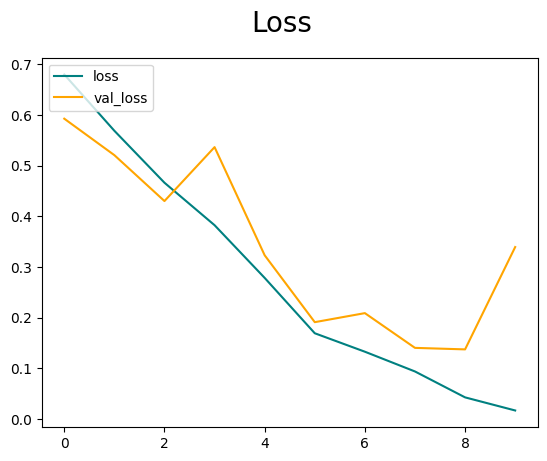

In [24]:
# Loss Plot
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

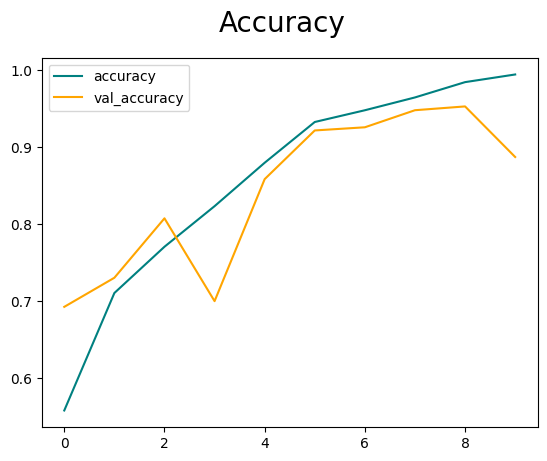

In [25]:
# Accuracy Plot
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


In [36]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.99239546, shape=(), dtype=float32) tf.Tensor(0.79816514, shape=(), dtype=float32) tf.Tensor(0.8881579, shape=(), dtype=float32)


<h1>Testing</h1>

In [38]:
import cv2

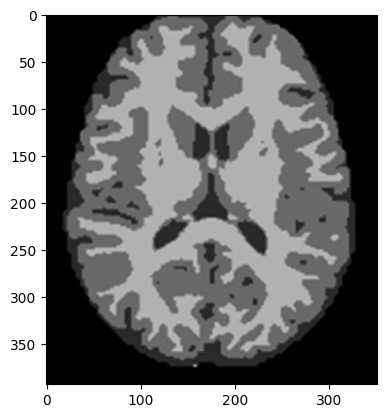

In [47]:
img = cv2.imread('NonDimentia.png')
plt.imshow(img)
plt.show()

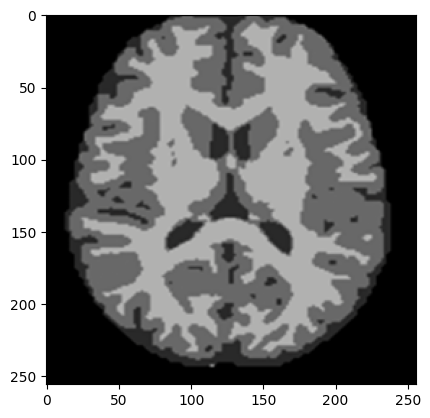

In [48]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [49]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0.5943957]], dtype=float32)

In [50]:
if yhat > 0.5:
    print("The image is predicted to be not dimentia")
elif yhat < 0.5:
    print("The image is predicted to be dimentia")

The image is predicted to be not dimentia


<h1>Saving the Model</h1>

In [51]:
from tensorflow.keras.models import load_model

In [52]:
model.save(os.path.join('models','alzheimers_classifier.h5'))

In [53]:
model_path = os.path.join(os.getcwd(), 'models', 'alzheimers_classifier.h5')
new_model = load_model(model_path)

In [54]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[0.5943957]], dtype=float32)